# Clustering Exhibition

In this exhibition we will show two unsupervised algorithms for clustering written from scratch and compared against their sklearn counterpart.  The first algorithm is KMeans, which simply finds the means of each cluster.  The second algorithm is GMM, which is an expectation-maximization algorithm that not only finds the means but the covariances as well.  Let's start by importing some relevant packages.

In [1]:
# Import packages used throughout
from matplotlib.patches import Ellipse
import matplotlib.pyplot as plt
import numpy as np

from from_scratch import gmm, kmeans
from sklearn import cluster, datasets, mixture

# %matplotlib qt


## Part 1: Symmetric Blobs

We will first start with symmetric 3D-blobs produced by ```sklearn.datasets.make_blobs()```.  These blobs have equal standard deviations in every direction, so their covariance matrix would be a diagonal matrix where each diagonal is the same value.

In [2]:
# Create 3D Blobs
features, targets = datasets.make_blobs(
    n_samples=400, n_features=3, centers=6, cluster_std=1.5)


### Section 1a: From Scratch

Now, let's test our from scratch KMeans model on the symmetric blobs data and visually inspect how it performs.

Means: [[-9.90445269 -0.96062896  0.66793183]
 [ 0.78911472  4.30050641 -3.441632  ]
 [-6.25017174 -9.36585823  2.70501586]
 [-1.15480393  2.97771219  5.71724083]
 [-3.0389326  -5.94789271  3.12567738]
 [-0.06108771 -1.19623719 -0.36433358]]


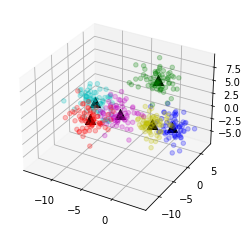

In [3]:
# KMeans
modelA = kmeans.KMeans(6)
modelA.fit(features.T)
meansA = modelA.means.T
print(f"Means: {meansA}")

# Visualize
ax = plt.axes(projection="3d")
for idx, color in enumerate(['r', 'b', 'g', 'm', 'c', 'y']):
    cluster_bools = targets == idx
    ax.scatter(features[cluster_bools, 0], features[cluster_bools,
               1], features[cluster_bools, 2], c=color, alpha=0.25)
    ax.scatter(meansA[idx, 0], meansA[idx, 1],
               meansA[idx, 2], c='k', marker='^', s=100)


As we can see, all of the black triangles, the predicted means, fall very well in line with the center of each cluster.  Let's now see how the from scratch GMM performs.

Means: [[ 0.75908061  4.31048743 -3.42376134]
 [-6.23226971 -9.36278841  2.74844704]
 [-9.91033759 -0.95769584  0.66754784]
 [-1.16224985  2.97022954  5.69869363]
 [-3.12460315 -6.02727124  3.05386455]
 [-0.02785014 -1.1850505  -0.39963977]]
Covariances: [2.3036089  2.24711194 2.2863848  2.19089077 2.22115653 1.7517899 ]


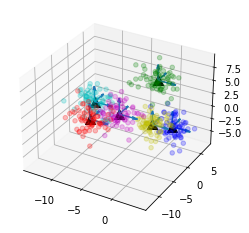

In [4]:
# GMM
modelA_GMM = gmm.GMM(6, "spherical")
modelA_GMM.fit(features.T)
meansA_GMM = modelA_GMM.means.T
covariancesA = modelA_GMM.covariances
stdA = np.sqrt(covariancesA)
print(f"Means: {meansA_GMM}")
print(f"Covariances: {covariancesA}")

# Visualize
ax = plt.axes(projection="3d")

x_unit = np.array([1, 0, 0])
y_unit = np.array([0, 1, 0])
z_unit = np.array([0, 0, 1])

for idx, color in enumerate(['r', 'b', 'g', 'm', 'c', 'y']):
    cluster_bools = targets == idx
    ax.scatter(features[cluster_bools, 0], features[cluster_bools,
               1], features[cluster_bools, 2], c=color, alpha=0.25)
    ax.scatter(meansA_GMM[idx, 0], meansA_GMM[idx, 1],
               meansA_GMM[idx, 2], c='k', marker='^', s=100)
    ax.quiver(meansA_GMM[idx, 0], meansA_GMM[idx, 1], meansA_GMM[idx, 2],
              2*stdA[idx]*x_unit, 2*stdA[idx]*y_unit, 2*stdA[idx]*z_unit)


The GMM uses KMeans as a starting-point for its own means, so it's no suprise that the GMM means are just as good as the KMeans means|.  A blue line jetting out from the black triangles along a particular unit-axis is that basis vector multiplied by (dobule) the standard deviations of that particular dimension.  As we can see, the blue lines just about span that respective cluster.  This makes sense, as these clusters are normally distributed, so a high proportion of the points should be encapsulated within 2 standard deviations of the respective mean.

### Section 1b: Sklearn

Let's now see how the Sklearn implementations does in comparison.

Means: [[-9.90445269 -0.96062896  0.66793183]
 [-0.06108771 -1.19623719 -0.36433358]
 [-3.0987892  -6.03920869  3.10545277]
 [ 0.78911472  4.30050641 -3.441632  ]
 [-6.33410197 -9.42758548  2.70640487]
 [-1.15480393  2.97771219  5.71724083]]


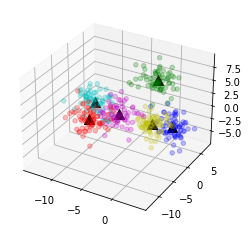

In [7]:
# KMeans
modelB = cluster.KMeans(n_clusters=6, init="k-means++",
                        n_init=1, algorithm="full")
modelB.fit(features)
meansB = modelB.cluster_centers_
print(f"Means: {meansB}")

# Visualize
ax = plt.axes(projection="3d")
for idx, color in enumerate(['r', 'b', 'g', 'm', 'c', 'y']):
    cluster_bools = targets == idx
    ax.scatter(features[cluster_bools, 0], features[cluster_bools,
               1], features[cluster_bools, 2], c=color, alpha=0.25)
    ax.scatter(meansB[idx, 0], meansB[idx, 1],
               meansB[idx, 2], c='k', marker='^', s=100)


Means: [[-1.16232278  2.9703615   5.69916189]
 [-6.22026206 -9.3503384   2.74678978]
 [-0.02898816 -1.18444191 -0.3992433 ]
 [-9.90972301 -0.95802705  0.66758733]
 [ 0.75977093  4.31135432 -3.42462383]
 [-3.11185218 -6.01464483  3.0593955 ]]
Covariances: [2.19037259 2.25415755 1.75511862 2.28713864 2.30206843 2.20877559]


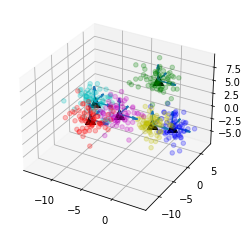

In [6]:
# GMM
modelB_GMM = mixture.GaussianMixture(
    n_components=6, covariance_type="spherical")
modelB_GMM.fit(features)
meansB_GMM = modelB_GMM.means_
covariancesB = modelB_GMM.covariances_
stdB = np.sqrt(covariancesB)
print(f"Means: {meansB_GMM}")
print(f"Covariances: {covariancesB}")

# Visualize
ax = plt.axes(projection="3d")

x_unit = np.array([1, 0, 0])
y_unit = np.array([0, 1, 0])
z_unit = np.array([0, 0, 1])

for idx, color in enumerate(['r', 'b', 'g', 'm', 'c', 'y']):
    cluster_bools = targets == idx
    ax.scatter(features[cluster_bools, 0], features[cluster_bools,
               1], features[cluster_bools, 2], c=color, alpha=0.25)
    ax.scatter(meansB_GMM[idx, 0], meansB_GMM[idx, 1],
               meansB_GMM[idx, 2], c='k', marker='^', s=100)
    ax.quiver(meansB_GMM[idx, 0], meansB_GMM[idx, 1], meansB_GMM[idx, 2],
              2*stdB[idx]*x_unit, 2*stdB[idx]*y_unit, 2*stdB[idx]*z_unit)


As we can see, the Sklearn implementations of these algorithms perform just as well as the from scratch implementations when tested on spherical data.

## Part 2: Nonsymmetric 2D Blobs

Let's now move on to the second case the from scratch code handles.  Here, different dimensions are independent but have varying standard deviations, so the covariance matrix will be a diagonal matrix.  Let's plot the data to get a better sense of this.

[]

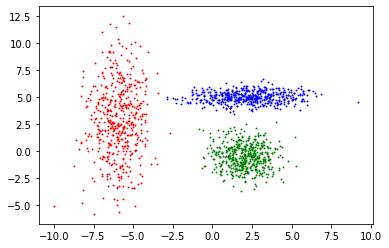

In [17]:
n_samples = 500

blobA = np.hstack((np.random.randn(n_samples, 1)*2,
                  np.random.randn(n_samples, 1)*0.5)) + np.array([2, 5])
blobB = np.hstack((np.random.randn(n_samples, 1),
                  np.random.randn(n_samples, 1)*3)) + np.array([-6, 3])
blobC = np.hstack((np.random.randn(n_samples, 1)*1.1,
                  np.random.randn(n_samples, 1)*1.1)) + np.array([2, -0.5])
blob_features = np.r_[blobA, blobB, blobC]

blob_targets = np.hstack(
    (np.zeros(n_samples), np.ones(n_samples), np.ones(n_samples)*2))

plt.scatter(blobA[:, 0], blobA[:, 1], 0.8, color="blue")
plt.scatter(blobB[:, 0], blobB[:, 1], 0.8, color="red")
plt.scatter(blobC[:, 0], blobC[:, 1], 0.8, color="green")
plt.plot()


As we can see, the red cluster's vertical component has a larger standard deviation than its horizontal component and vice versa for the blue cluster.

### Section 2a: From Scratch

In [18]:
# GMM
modelC = gmm.GMM(3, "diagonal")
modelC.fit(blob_features.T)
meansC = modelC.means.T
covariancesC = modelC.covariances
print(f"Means: {meansC}")
print(f"Covariances: {covariancesC}")


Means: [[ 2.01730412 -0.51667244]
 [-5.95404939  2.83340594]
 [ 2.21603043  4.99692763]]
Covariances: [[ 1.15051688  1.28193535]
 [ 0.9977035  11.11316385]
 [ 3.63717609  0.26790881]]


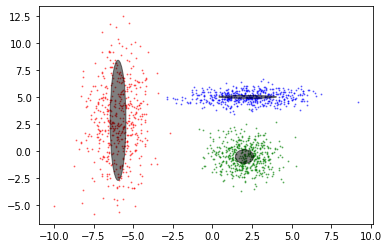

In [19]:
# Visualize
fig, ax = plt.subplots()
for i, color in enumerate(["blue", "red", "green"]):
    plt.scatter(blob_features[blob_targets == i, 0],
                blob_features[blob_targets == i, 1], 0.8, color=color, alpha=0.5)

    covar_matrix = np.diag(covariancesC[i])
    eigenvalues, eigenvectors = np.linalg.eigh(covar_matrix)
    u = eigenvectors[0] / np.linalg.norm(eigenvectors[0])

    angle = np.arctan(u[1] / u[0] if u[0] != 0 else np.inf)
    angle = 180 * angle / np.pi
    ellipse = Ellipse(meansC[i], eigenvalues[0],
                      eigenvalues[1], 180 + angle, color='k')
    ellipse.set_alpha(0.5)
    ax.add_artist(ellipse)

plt.show()


### Section 2b: Sklearn

In [20]:
# GMM
modelD = mixture.GaussianMixture(
    n_components=3, covariance_type="diag")
modelD.fit(blob_features)
meansD = modelD.means_
covariancesD = modelD.covariances_
print(f"Means: {meansD}")
print(f"Covariances: {covariancesD}")


Means: [[ 2.01730497 -0.51667873]
 [-5.95401933  2.83343538]
 [ 2.21610682  4.99692434]]
Covariances: [[ 1.15051699  1.28191297]
 [ 0.99776857 11.11308718]
 [ 3.63675647  0.26791355]]


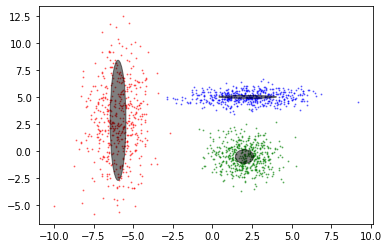

In [21]:
# Visualize
fig, ax = plt.subplots()
for i, color in enumerate(["blue", "red", "green"]):
    plt.scatter(blob_features[blob_targets == i, 0],
                blob_features[blob_targets == i, 1], 0.8, color=color, alpha=0.5)

    covar_matrix = np.diag(covariancesC[i])
    eigenvalues, eigenvectors = np.linalg.eigh(covar_matrix)
    u = eigenvectors[0] / np.linalg.norm(eigenvectors[0])

    angle = np.arctan(u[1] / u[0] if u[0] != 0 else np.inf)
    angle = 180 * angle / np.pi
    ellipse = Ellipse(meansC[i], eigenvalues[0],
                      eigenvalues[1], 180 + angle, color='k')
    ellipse.set_alpha(0.5)
    ax.add_artist(ellipse)

plt.show()


As in the case with the spherical data, both the from scratch and sklearn implementations are able to accurately identify the clusters' means and covariances.  This is illustrated by the black circles in the clusters which center around the respective means and have lengths and widths equal to the variance of that respective dimension.

In this notebook, we exibted two clustering algorithms implemented from scratch that perform just as well as their industry-standard, sklearn counterparts.  A major drawback of the from scratch implementation, though, is that it cannot handle full covariance matrices, only diagnomal ones.  One would have a full covariance matrix when their features are correlated, which is often the case.  This is something that I could flesh out for a future implementation.